In [1]:
import os, sys

cwd = os.getcwd()
module_path = os.path.abspath(os.path.join('..'))

sys.path.insert(0, os.path.join(cwd, "../"))
sys.path.insert(0, os.path.join(cwd, "../student_life/"))
sys.path.insert(0, os.path.join(cwd, "../student_life/src/"))
sys.path.insert(0, os.path.join(cwd, "../student_life/src/bin/"))

import copy
from scipy import stats
import pickle
import importlib
import src.utils.student_utils as student_utils
from collections import defaultdict
import sklearn.metrics.pairwise.euclidean_distances as euclidean_distance

import src.definitions as definitions
import pandas as pd
import numpy as np
from IPython.display import display
from src.data_manager import student_life_var_binned_data_manager
importlib.reload(student_life_var_binned_data_manager)
importlib.reload(student_utils)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

fig_loc = "/Users/nsimsiri/Desktop/histograms"
print(module_path)

ModuleNotFoundError: No module named 'sklearn.metrics.pairwise.euclidean_distances'; 'sklearn.metrics.pairwise' is not a package

In [3]:
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
def load_features(student_id=2):
    path = "{}/data/student_life_minimal_processed_data/student_{}".format(module_path, student_id)
    assert(os.path.exists(path))
    feats = {}
    for _file in os.listdir(path):
        feat_path = path + "/" + _file
        df = pd.read_csv(feat_path)
        print('student {} loaded feat: {}'.format(student_id, _file))      
        feat_name = _file.replace('.csv', '')
        feats[feat_name] = df
    return feats
        

feats = load_features(student_id=46)
print(len(feats))

student 46 loaded feat: sleep_details.csv
student 46 loaded feat: audio_details.csv
student 46 loaded feat: dark_details.csv
student 46 loaded feat: stress_details.csv
student 46 loaded feat: phonecharge_details.csv
student 46 loaded feat: call_log_details.csv
student 46 loaded feat: phonelock_details.csv
student 46 loaded feat: dinning_details.csv
student 46 loaded feat: conversation_details.csv
student 46 loaded feat: sms_details.csv
student 46 loaded feat: gps_details.csv
student 46 loaded feat: activity_details.csv
12


In [3]:
i2f = []
for i,k in enumerate(feats.keys()):
    print(i, k)
    i2f.append(k)
print(i2f)


0 sleep_details
1 audio_details
2 dark_details
3 stress_details
4 phonecharge_details
5 call_log_details
6 phonelock_details
7 dinning_details
8 conversation_details
9 sms_details
10 gps_details
11 activity_details
['sleep_details', 'audio_details', 'dark_details', 'stress_details', 'phonecharge_details', 'call_log_details', 'phonelock_details', 'dinning_details', 'conversation_details', 'sms_details', 'gps_details', 'activity_details']


In [4]:
def index_time_to_df(df):
    df['time'] = pd.to_datetime(df['time'])
    df = df.set_index('time')
    return df

## Daily Stress

In [5]:
FEAT_IDX = i2f[3]
stress = feats['stress_details']
# display(stress)
def to_mode(subset):
    freq = subset['stress_level'].values
    m,_ = stats.mode(freq)
    return float('NaN') if len(m) == 0 else m[0]

rec = stress.iloc[0]
# stress['time'] = pd.to_datetime(stress['time'])
# stress = stress.set_index('time')

stress = index_time_to_df(stress)
# stress = stress.query('time < \'2013-03-25 00:00:0\'')
sample_freq = 1440
day_interval = int(1440/sample_freq)
print(day_interval)
sample = stress.resample('{}T'.format(sample_freq)).apply(to_mode)
sample = sample.ffill()

stress = pd.DataFrame(sample)
display(stress)


1


,0
time,
2013-03-24,2.0
2013-03-25,2.0
2013-03-26,2.0
2013-03-27,2.0
2013-03-28,2.0
2013-03-29,2.0
2013-03-30,2.0
2013-03-31,2.0
2013-04-01,2.0


## Activity

In [6]:
np.histogram([0,1,1,3,2,3,3], bins=range(5))

(array([1, 2, 1, 3]), array([0, 1, 2, 3, 4]))

1440T
42


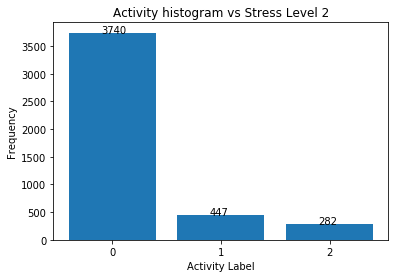

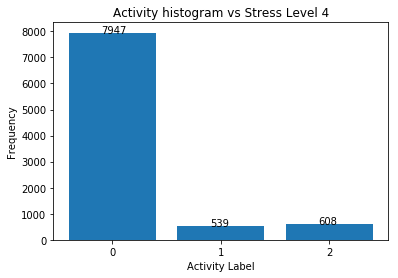

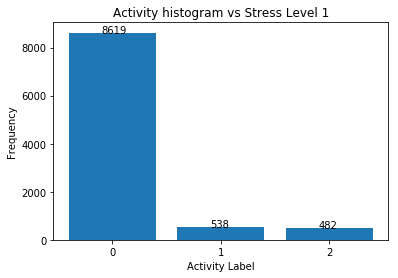

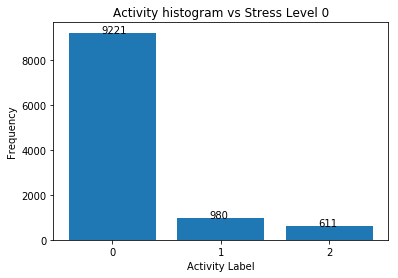

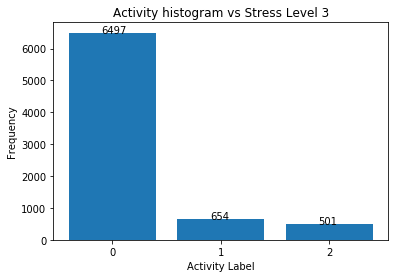

In [7]:
# 0-3
activity_bins = range(4) #0,1,2,3
activities = feats['activity_details']
def f_activity_hist(df):
    rows = df['activity_inference'].values
    his, _ = np.histogram(rows, bins=activity_bins)
    return his
    
activities = index_time_to_df(activities)
# display(activities)

bin_freq = 1440
sample_rule = '{}T'.format(bin_freq)
print(sample_rule)
activity_hist = activities.resample(sample_rule).apply(f_activity_hist)
print(len(activity_hist))
# display(activity_hist)
# display(activities)
# print('2013-03-27' in activity_hist)
# print(activity_hist.loc['2013-03-27']) #numpy array
stress_map = defaultdict(list)
for idx, row in stress.iterrows():
    stress_val = int(row.values[0])
    if idx in activity_hist:
        stress_map[stress_val].append(activity_hist.loc[idx])
        
# print(stress_map)
def plot_activity(title, y):
    y = [int(ix) for ix in y]
    x = range(3)
    plt.bar(range(3),y)
    plt.xlabel('Activity Label')
    plt.ylabel('Frequency')
    plt.xticks(x,[str(i) for i in range(0,max(x)+1)])
    plt.title(title)
    for i in range(len(x)):
        plt.text(x = x[i]-0.1 , y = y[i]-0.5, s = y[i], size = 10)

    plt.savefig(fig_loc + '/' + title + '.png')
    plt.show()
    
for key,val in stress_map.items():
   
    expanded_his = np.array(val)
    reduce_his = np.mean(expanded_his,axis=0)
#     print(key, np.mean(expanded_his,axis=0))
        
    plot_activity("Activity histogram vs Stress Level {}".format(key), reduce_his)

## Conversation

264
1440T
2 [33.55555556  1.88888889  0.22222222  0.          0.        ]


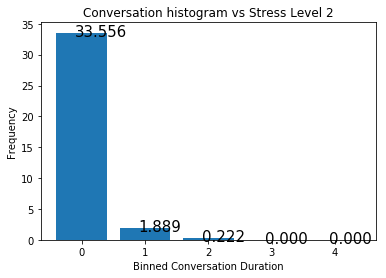

4 [55.  0.  0.  0.  0.]


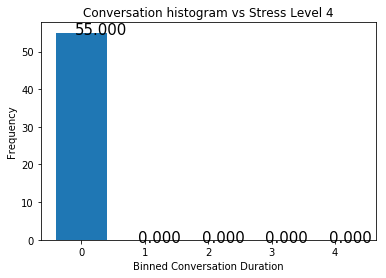

1 [43.6  2.   0.   0.   0.4]


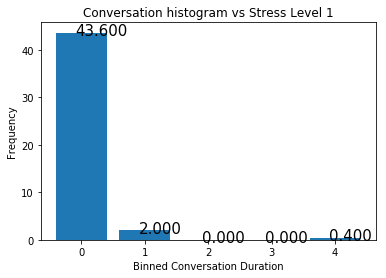

0 [25.  2.  1.  0.  0.]


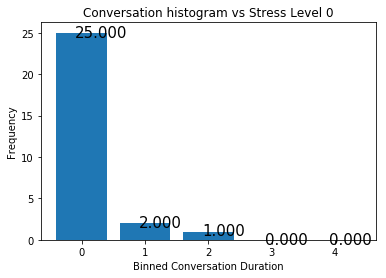

3 [30.04761905  1.33333333  0.0952381   0.          0.        ]


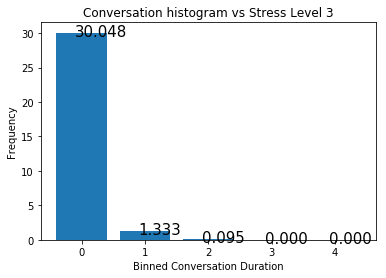

In [8]:
# 0-3
conv_bin = range(5) #0,1,2,3
conversation = feats['conversation_details']
max_conv = conversation['conv_duration_min'].max()
min_conv = conversation['conv_duration_min'].min()
print(max_conv)
def f_conv_hist(df):
    rows = df['conv_duration_min'].values
    his, _ = np.histogram(rows, bins=len(conv_bin), range=(min_conv,max_conv))
    return his
    
conversation = index_time_to_df(conversation)
# display(conversation)

bin_freq = 1440
sample_rule = '{}T'.format(bin_freq)
print(sample_rule)
conv_hist = conversation.resample(sample_rule).apply(f_conv_hist)

stress_map = defaultdict(list)
for idx, row in stress.iterrows():
    stress_val = int(row.values[0])
    if idx in conv_hist:
        stress_map[stress_val].append(conv_hist.loc[idx])
        
# print(stress_map)
def plot_activity(title, y):
#     y = [int(ix) for ix in y]
    x = conv_bin
    plt.bar(x,y)
    plt.xlabel('Binned Conversation Duration')
    plt.ylabel('Frequency')
    plt.xticks(x,[str(i) for i in range(0,max(x)+1)])
    plt.title(title)
    for i in range(len(x)):
        plt.text(x = x[i]-0.1 , y = y[i]-0.5, s = '%.3f'%(y[i]), size = 15)

    plt.savefig(fig_loc + '/' + title + '.png')
    plt.show()
    
for key,val in stress_map.items():
   
    expanded_his = np.array(val)
    reduce_his = np.mean(expanded_his,axis=0)
    print(key, np.mean(expanded_his,axis=0))
        
    plot_activity("Conversation histogram vs Stress Level {}".format(key), reduce_his)

## Sleep

1440T
[2, 4, 1, 0, 2, 1, 3, 1, 1, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 4]
[6.666666666666667, 7.0, 7.0, 7.0, 5.0, 8.0, 7.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 3.0, 3.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 6.0]
{2: array([0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0]), 4: array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]), 1: array([0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0]), 0: array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]), 3: array([ 0,  0,  0,  2,  0,  0, 15,  3,  0,  1,  0])}

[0 0 0 0 0 4 3 0 0 0 0]


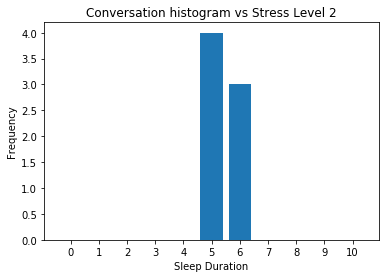


[0 0 0 0 0 0 1 1 0 0 0]


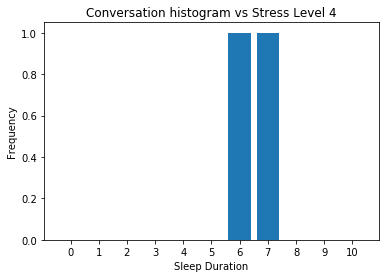


[0 0 0 0 0 0 2 2 1 0 0]


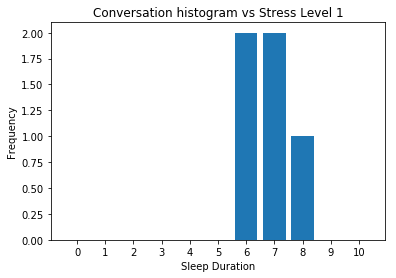


[0 0 0 0 0 0 0 1 0 0 0]


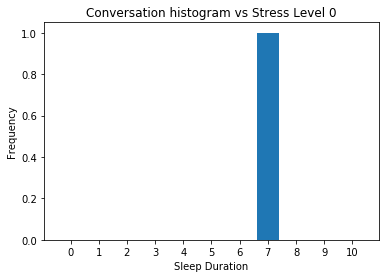


[ 0  0  0  2  0  0 15  3  0  1  0]


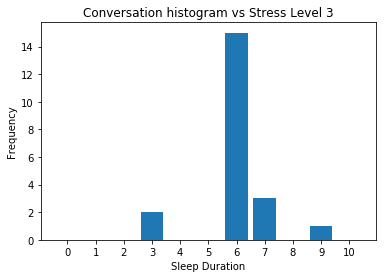

In [9]:
# 0-3
sleep_bin = range(4) #0,1,2,3
sleep = feats['sleep_details']
key = 'hours_slept'
max_sleep = sleep[key].max()
min_sleep = sleep[key].min()
def f_sleep_hist(df):
    rows = df[key].values
    his, _ = np.histogram(rows, bins=len(sleep_bin), range=(min_sleep,max_sleep))
    return his

sleep = index_time_to_df(sleep)
# display(sleep)

bin_freq = 1440
sample_rule = '{}T'.format(bin_freq)
print(sample_rule)
sleep_agg = sleep.resample(sample_rule).mean()[key]#apply(f_sleep_hist)
sleep_agg = sleep_agg.ffill()
# print(sleep_agg)
Y1, Y2 = [], []
for idx, row in stress.iterrows():
    stress_val = int(row.values[0])
    if idx in sleep_agg:
        Y1.append(stress_val)
        Y2.append(sleep_agg[idx])
stress_freq_map = defaultdict(list)
print(Y1)
print(Y2)
for i in range(len(Y1)):
    s, c = Y1[i], Y2[i]
    stress_freq_map[s].append(c)

stress_map = {k: np.histogram(v, bins=range(12))[0] for k,v in stress_freq_map.items()}
print(stress_map)
def plot_convo(title, y):
#     y = [int(ix) for ix in y]
    x = range(len(y))
    plt.bar(x,y)
    plt.xlabel('Sleep Duration')
    plt.ylabel('Frequency')
    plt.xticks(x,[str(i) for i in range(0,max(x)+1)])
    plt.title(title)
#     for i in range(len(x)):
#         plt.text(x = x[i]-0.1 , y = y[i]-0.5, s = '%.3f'%(y[i]), size = 15)

    plt.savefig(fig_loc + '/' + title + '.png')
    plt.show()
    
for key,val in stress_map.items():
    print()
    print(val)
    plot_convo("Conversation histogram vs Stress Level {}".format(key), list(val))

## Audio

{0, 1, 2}

1440T
2 [9464.61538462 9869.69230769 8819.            0.        ]


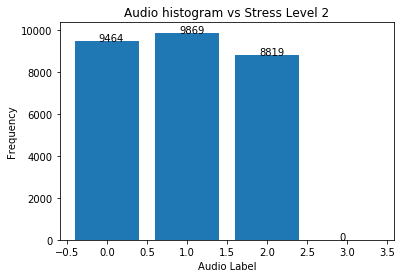

4 [21447.5 14637.  12698.5     0. ]


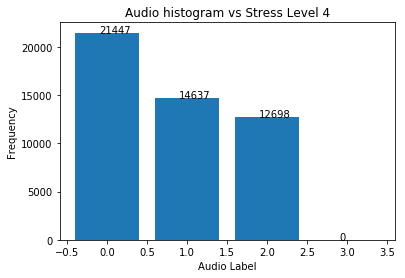

1 [23081.8 18073.6 11230.4     0. ]


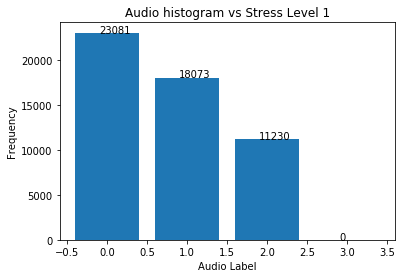

0 [22874. 17538. 17212.     0.]


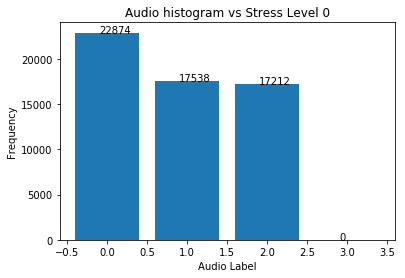

3 [17145.95238095 12379.23809524 10421.             0.        ]


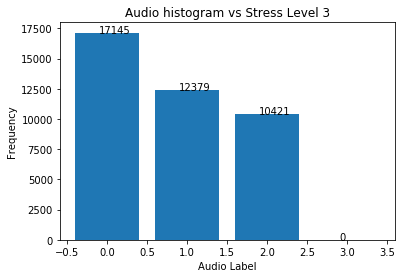

In [10]:
# 0-4
audio_bin = range(5) #0,1,2,3
audio = feats['audio_details']
key = 'audio_activity_inference'
display(set(audio[key].values))

def f_audio_hist(df):
    rows = df[key].values
    his, _ = np.histogram(rows, bins=audio_bin, range=(0,len(audio_bin)))
    return his

audio = index_time_to_df(audio)
# display(audio)

bin_freq = 1440
sample_rule = '{}T'.format(bin_freq)
print(sample_rule)
audio_hist = audio.resample(sample_rule).apply(f_audio_hist)
audio_hist = audio_hist.ffill()

# print(audio_hist)
stress_map = defaultdict(list)
for idx, row in stress.iterrows():
    stress_val = int(row.values[0])
    if idx in audio_hist:
        stress_map[stress_val].append(audio_hist.loc[idx])
# print(stress_map)
# print(stress_map)
def plot_audio(title, y):
    y = [int(ix) for ix in y]
    x = range(len(audio_bin)-1)
    plt.bar(x,y)
    plt.xlabel('Audio Label')
    plt.ylabel('Frequency')
#     plt.xticks(x,[str(i) for i in range(0,max(x)+1)])
    plt.title(title)
    for i in range(len(x)):
        plt.text(x = x[i]-0.1 , y = y[i]-0.5, s = y[i], size = 10)

    plt.savefig(fig_loc + '/' + title + '.png')
    plt.show()
    
for key,val in stress_map.items():
   
    expanded_his = np.array(val)
    reduce_his = np.mean(expanded_his,axis=0)
    print(key, np.mean(expanded_his,axis=0))
        
    plot_audio("Audio histogram vs Stress Level {}".format(key), reduce_his)

60 582
1440T
2 [1.         0.         0.22222222 0.22222222 0.22222222]


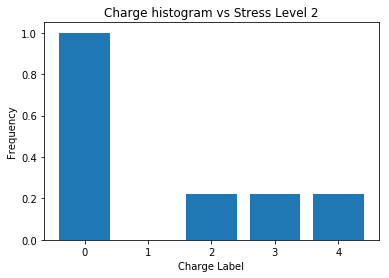

4 [1.  0.5 0.  1.  0. ]


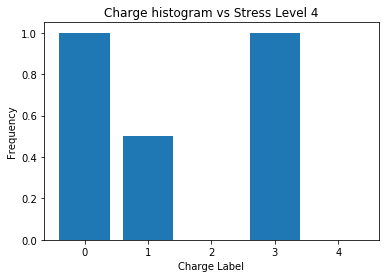

1 [0.4 0.  0.  0.6 0.2]


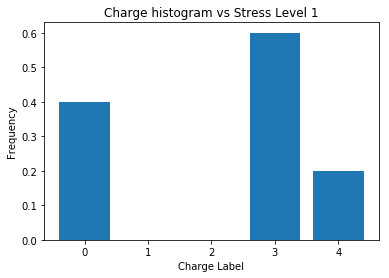

0 [0. 0. 0. 1. 0.]


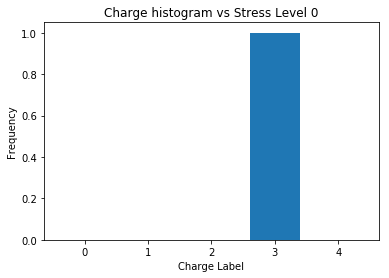

3 [0.61904762 0.14285714 0.0952381  0.28571429 0.19047619]


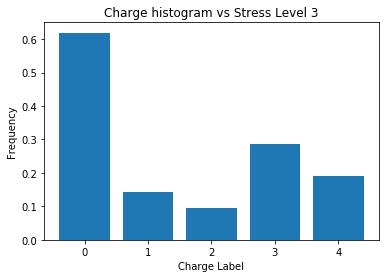

In [11]:
key = 'phonecharge_duration_min'
charge = feats['phonecharge_details']

min_charge = charge[key].min()
max_charge = charge[key].max()
print(min_charge, max_charge)
def f_charge_hist(df):
    rows = df[key].values
    his, _ = np.histogram(rows, bins=5, range=(min_charge,max_charge))
    return his

charge = index_time_to_df(charge)
# display(charge)

bin_freq = 1440
sample_rule = '{}T'.format(bin_freq)
print(sample_rule)
charge_hist = charge.resample(sample_rule).apply(f_charge_hist)
charge_hist = charge_hist.ffill()
# print(charge_hist)

stress_map = defaultdict(list)
for idx, row in stress.iterrows():
    stress_val = int(row.values[0])
    if idx in charge_hist:
        stress_map[stress_val].append(charge_hist.loc[idx])
# print(stress_map)

def plot_charge(title, y):
    y = [float(ix) for ix in y]
    x = range(5)
    plt.bar(x,y)
    plt.xlabel('Charge Label')
    plt.ylabel('Frequency')
#     plt.xticks(x,[str(i) for i in range(0,max(x)+1)])
    plt.title(title)
#     for i in range(len(x)):
#         plt.text(x = x[i]-0.1 , y = y[i]-0.5, s = y[i], size = 10)

    plt.savefig(fig_loc + '/' + title + '.png')
    plt.show()
    
for key,val in stress_map.items():
   
    expanded_his = np.array(val)
    reduce_his = np.mean(expanded_his,axis=0)
    print(key, np.mean(expanded_his,axis=0))
        
    plot_charge("Charge histogram vs Stress Level {}".format(key), reduce_his)

60 542
1440T
2 [1.55555556 0.11111111 0.33333333 0.33333333 0.        ]


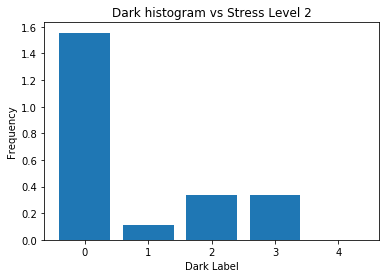

4 [2.  0.  0.  0.5 0.5]


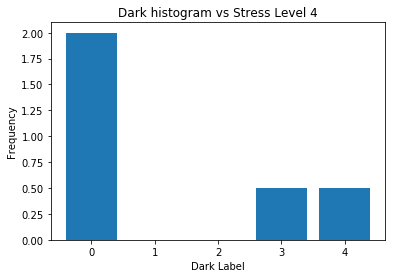

1 [2.  0.6 0.  1.2 0. ]


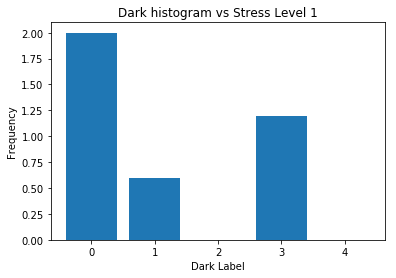

0 [3. 1. 1. 0. 0.]


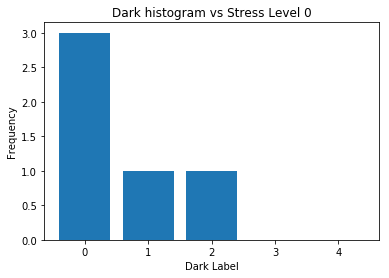

3 [1.95238095 0.47619048 0.38095238 0.19047619 0.19047619]


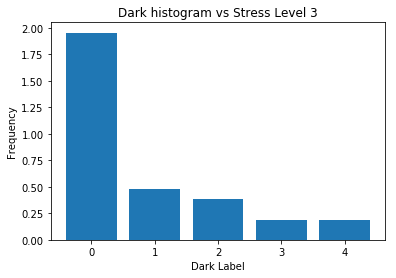

In [12]:
dark = feats['dark_details']
key = 'dark_duration_min'
# display(dark)

min_dark = dark[key].min()
max_dark = dark[key].max()
print(min_dark, max_dark)
def f_dark_hist(df):
    rows = df[key].values
    his, _ = np.histogram(rows, bins=5, range=(min_dark,max_dark))
    return his

dark = index_time_to_df(dark)
# display(dark)

bin_freq = 1440
sample_rule = '{}T'.format(bin_freq)
print(sample_rule)
dark_hist = dark.resample(sample_rule).apply(f_dark_hist)
dark_hist = dark_hist.ffill()
# print(charge_hist)

stress_map = defaultdict(list)
for idx, row in stress.iterrows():
    stress_val = int(row.values[0])
    if idx in dark_hist:
        stress_map[stress_val].append(dark_hist.loc[idx])
# print(stress_map)

def plot_dark(title, y):
    y = [float(ix) for ix in y]
    x = range(5)
    plt.bar(x,y)
    plt.xlabel('Dark Label')
    plt.ylabel('Frequency')
#     plt.xticks(x,[str(i) for i in range(0,max(x)+1)])
    plt.title(title)
#     for i in range(len(x)):
#         plt.text(x = x[i]-0.1 , y = y[i]-0.5, s = y[i], size = 10)

    plt.savefig(fig_loc + '/' + title + '.png')
    plt.show()
    
for key,val in stress_map.items():
   
    expanded_his = np.array(val)
    reduce_his = np.mean(expanded_his,axis=0)
    print(key, np.mean(expanded_his,axis=0))
        
    plot_dark("Dark histogram vs Stress Level {}".format(key), reduce_his)

60 526
1440T
2 [1.22222222 0.22222222 0.33333333 0.33333333 0.        ]


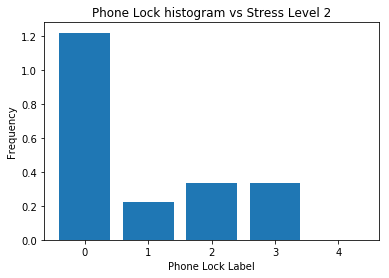

4 [2.5 1.  0.  1.  0. ]


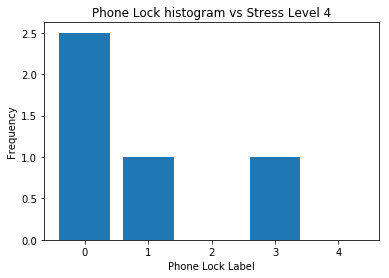

1 [4.  0.6 0.  0.6 0.6]


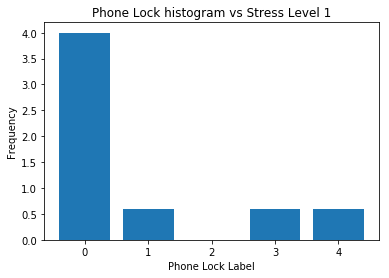

0 [5. 1. 0. 0. 0.]


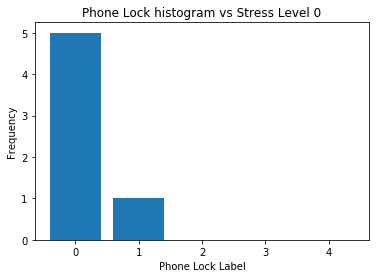

3 [2.28571429 0.23809524 0.28571429 0.14285714 0.14285714]


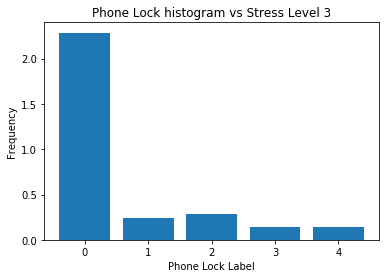

In [13]:
lock = feats['phonelock_details']
key = 'phonelock_duration_min'
min_lock = lock[key].min()
max_lock = lock[key].max()
print(min_lock, max_lock)
def f_lock_hist(df):
    rows = df[key].values
    his, _ = np.histogram(rows, bins=5, range=(min_lock,max_lock))
    return his

lock = index_time_to_df(lock)
# display(lock)

bin_freq = 1440
sample_rule = '{}T'.format(bin_freq)
print(sample_rule)
lock_hist = lock.resample(sample_rule).apply(f_lock_hist)
lock_hist = lock_hist.ffill()
# print(lock_hist)

stress_map = defaultdict(list)
for idx, row in stress.iterrows():
    stress_val = int(row.values[0])
    if idx in lock_hist:
        stress_map[stress_val].append(lock_hist.loc[idx])
# print(stress_map)

def plot_lock(title, y):
    y = [float(ix) for ix in y]
    x = range(5)
    plt.bar(x,y)
    plt.xlabel('Phone Lock Label')
    plt.ylabel('Frequency')
#     plt.xticks(x,[str(i) for i in range(0,max(x)+1)])
    plt.title(title)
#     for i in range(len(x)):
#         plt.text(x = x[i]-0.1 , y = y[i]-0.5, s = y[i], size = 10)

    plt.savefig(fig_loc + '/' + title + '.png')
    plt.show()
    
for key,val in stress_map.items():
   
    expanded_his = np.array(val)
    reduce_his = np.mean(expanded_his,axis=0)
    print(key, np.mean(expanded_his,axis=0))
        
    plot_lock("Phone Lock histogram vs Stress Level {}".format(key), reduce_his)